# 7.1 Exemplo: passeio aleatorio

In [128]:
import numpy as np

A simulacao de passeios eleatoriso fornece uma aplicacao ilustrativa da utilizacao de operacoes de arrays.  Priemiro consideraremos um passeio aleatorio simples comecando em 0 e com os passos 1 e -1
ocorerndo com igual probabilidade.

Aqui esta uma maneira em Python puro de implementar um unico passeio aleatorio com 1.000 passos usando o modulo intrebno random

In [129]:
import random
posicion = 0
walk = [posicion]
nsteps = 1000
for _ in range(nsteps):
    step = 1 if random.randint(0, 1) == 0 else -1
    walk.append(step)
    posicion += step
    walk.append(posicion)

In [130]:
import matplotlib.pyplot as plt

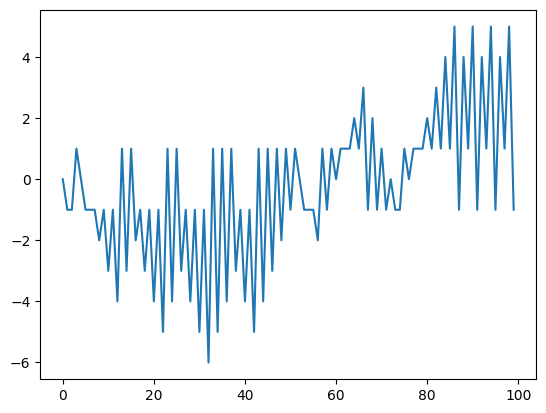

In [131]:
plt.plot(walk[:100])

Voce deve ter percebido que walk e a soma cumulativa dos passos aleatorios que pode ser avaliado como espressao de array. Portanto,  usarei o modulo `numpy.random` para fazer 1000 arremessos de modo
de uma so vez, configura-los com 1 e -1 e calcular a soma acumulada

In [132]:
nsteps = 1000

In [133]:
rng = np.random.default_rng(12345)

In [134]:
draws = rng.integers(0, 2, size = nsteps)

In [136]:
steps = np.where(draws == 0, 1, -1)

In [138]:
walk = steps.cumsum()

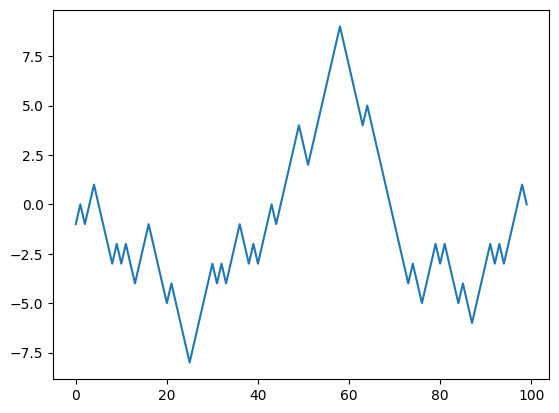

In [142]:
plt.plot(walk[:100])

A partir dai podemos comecar a estrar dados estatisticos com valores minimo e maximo que ocorrem ao longo fa trajetoria do passeio


In [143]:
walk.min()

np.int64(-8)

In [144]:
walk.max()

np.int64(50)

Uma estatiistica mais complicada e a hora da primeira travesia,  o momneto em que o passo aleatorio alcanca um valor especifico. Podemos querer saber quanto tempo o passieo a; eatorio demorou para chegar a pelo menos 10 passos de distamcia da origem 0 em qualquer direcao `np.abs(walk) >= 10` fornece um array booleano que indica onde o passeio alcancou ou ultrapascou o valor 10 mas queremos o indice do primeiro 10 ou -10. podemos calcular isso usando `argmax`, que retorna o primeiro indece do valor maximo do array booleano (True e o valor maximo)

In [145]:
(np.abs(walk) >= 10).argmax()

np.int64(155)

Observe que usar o metodo `agmax()`nem sempre e eficiente porque ele faz uma varredura completa no array. Nesse caso especifico, uma vez que uma valor True for observado saberamos que esse e o valor maximo